<a href="https://colab.research.google.com/github/choinkyo/Image-Representation/blob/master/Convolution_Neural_Network_to_recognize_Rock_Paper_Scissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolution Neural Network to recognize Rock/Paper/Scissors

## Load Rock/Paper/Scissors Dataset
First we download the data and put them into its own directories for model training and evaluation. There are two dataset in zip format. Download each and put them into the corresponding directories.

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2020-06-22 04:08:21--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.12.240, 2607:f8b0:4004:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.12.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  81.5MB/s    in 2.3s    

2020-06-22 04:08:23 (81.5 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-06-22 04:08:24--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.15.112, 2607:f8b0:4004:811::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.15.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tm

In [2]:
%tensorflow_version 1.14
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


After running the folloiwng code, you will have exactly 840 images for each gesture. 

In [3]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock07-k03-101.png', 'rock07-k03-088.png', 'rock06ck02-067.png', 'rock02-079.png', 'rock01-014.png', 'rock01-096.png', 'rock01-042.png', 'rock05ck01-016.png', 'rock07-k03-032.png', 'rock03-103.png']
['paper07-102.png', 'paper06-075.png', 'paper03-076.png', 'paper06-019.png', 'paper05-107.png', 'paper07-013.png', 'paper06-083.png', 'paper06-018.png', 'paper06-112.png', 'paper07-106.png']
['scissors04-034.png', 'testscissors01-086.png', 'scissors02-091.png', 'scissors01-103.png', 'scissors03-065.png', 'scissors04-051.png', 'scissors01-093.png', 'scissors04-029.png', 'scissors04-118.png', 'scissors04-079.png']


Now, let's plot 2 images from each class.  You wil find those images are taken from different views and images vary a lot even for the same gesture. 

/tmp/rps/rock/rock07-k03-101.png


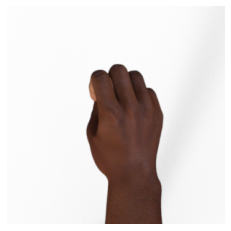

/tmp/rps/rock/rock07-k03-088.png


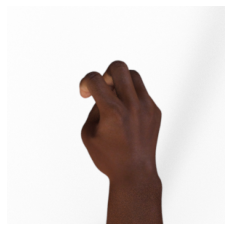

/tmp/rps/paper/paper07-102.png


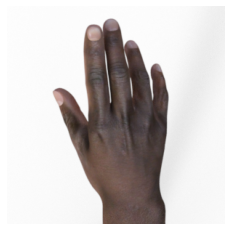

/tmp/rps/paper/paper06-075.png


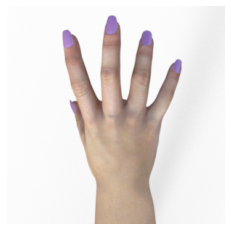

/tmp/rps/scissors/scissors04-034.png


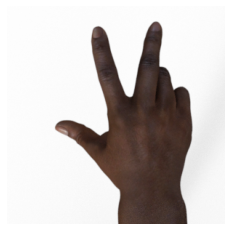

/tmp/rps/scissors/testscissors01-086.png


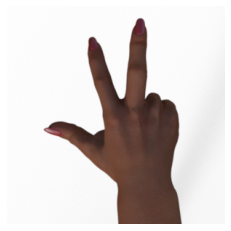

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

## TASK 1: Build a fully connect Neural Network
First, let's try what we've learned from the previous lecture. We will build a FULLY connect neural networks to classify the gesture images.You are free to experiment with different structure of the network, data augmentation, dropout, different optimizer, and etc, to try to achieve the best performance on the TEST data in terms of accuracy.  Watch out for overfitting.

Note that you should set test aside when you train your model. In the end, please report your model accuracy on the test set. 

## Downsampling the data into folders:

In [5]:
import shutil

directories = [
    '/tmp/rps-train-set', 
    '/tmp/rps-train-set/paper',
    '/tmp/rps-train-set/rock',
    '/tmp/rps-train-set/scissors',
    '/tmp/rps-validation-set', 
    '/tmp/rps-validation-set/paper',
    '/tmp/rps-validation-set/rock',
    '/tmp/rps-validation-set/scissors',

]

for directory in directories:
    if not os.path.exists(directory):
        os.mkdir(directory)
        
# move images to train directory
for i in ['paper', 'rock', 'scissors']:
    files = os.listdir('/tmp/rps/' + i)
    for file in files:
      f = '/tmp/rps/' + i + '/' + file
      if random.uniform(0, 1) < 0.7:
          shutil.copyfile(f, '/tmp/rps-train-set/' + i + '/' + file)
      else:
          shutil.copyfile(f, '/tmp/rps-validation-set/' + i + '/' + file)

In [6]:
# TODO
from keras import layers
from keras import models

# Define the variables 
train_dir = '/tmp/rps-train-set'
validation_dir = '/tmp/rps-validation-set'
test_dir = '/tmp/rps-test-set'

Using TensorFlow backend.


## Build a Neural Network

In [8]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Flatten(input_shape=(150,150,3)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(3, activation='softmax')) 

model.summary()

#Compile the model
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 67500)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               34560512  
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 771       
Total params: 34,955,267
Trainable params: 34,955,267
Non-trainable params: 0
_________________________________________________________________


##Data Preprocessing

In [9]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='categorical'
)

Found 1788 images belonging to 3 classes.
Found 732 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [10]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 3)


In [11]:
history = model.fit(train_generator, 
                    epochs=25, 
                    steps_per_epoch=20, 
                    validation_data = validation_generator, 
                    verbose = 1, 
                    validation_steps=3)

Epoch 1/25
20/20 [==============================] - 3s 140ms/step - loss: 89.4021 - acc: 0.3067 - val_loss: 19.4857 - val_acc: 0.3333
Epoch 2/25
20/20 [==============================] - 1s 73ms/step - loss: 9.7848 - acc: 0.2750 - val_loss: 1.0980 - val_acc: 0.4000
Epoch 3/25
20/20 [==============================] - 2s 77ms/step - loss: 1.2814 - acc: 0.3975 - val_loss: 1.0965 - val_acc: 0.3167
Epoch 4/25
20/20 [==============================] - 2s 77ms/step - loss: 3.8720 - acc: 0.3550 - val_loss: 1.0828 - val_acc: 0.4667
Epoch 5/25
20/20 [==============================] - 2s 79ms/step - loss: 1.0970 - acc: 0.3325 - val_loss: 1.0944 - val_acc: 0.3333
Epoch 6/25
20/20 [==============================] - 2s 81ms/step - loss: 1.0998 - acc: 0.3950 - val_loss: 1.0992 - val_acc: 0.3333
Epoch 7/25
20/20 [==============================] - 1s 75ms/step - loss: 1.1011 - acc: 0.2990 - val_loss: 1.1005 - val_acc: 0.2333
Epoch 8/25
20/20 [==============================] - 2s 75ms/step - loss: 1.0980 

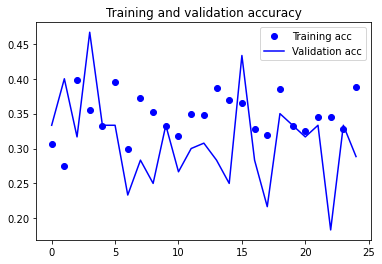

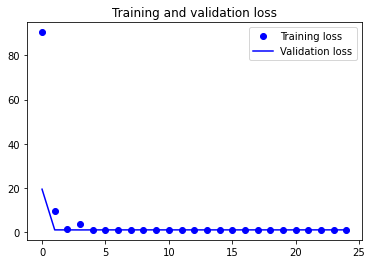

In [12]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [13]:
model.save('rsp.h4')

In [14]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.summary()

# Compile the Model 
from keras import optimizers
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc']
)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [15]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='categorical'
)

Found 1788 images belonging to 3 classes.
Found 732 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


## TASK 2: Build Convolution Neural Network
Now, let's try a convolution neural network (CNN) and see if we can achieve better performance. Similarly you are free to experiment with different structure of the network, techniques to avoid overfitting, different optimizer, and etc, to try to achieve the best performance on the TEST data in terms of accuracy.

Note that you should set test aside when you train your model. In the end, please report your model accuracy on the test set. 

In [16]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [17]:
VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [18]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [19]:
#complie
model.compile(loss = 'categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['acc'])

history = model.fit(train_generator, 
                    epochs=20, 
                    steps_per_epoch=20, 
                    validation_data = validation_generator, 
                    verbose = 1, 
                    validation_steps=3)

Epoch 1/20
20/20 [==============================] - 24s 1s/step - loss: 1.4843 - acc: 0.3286 - val_loss: 1.0919 - val_acc: 0.4543
Epoch 2/20
20/20 [==============================] - 20s 1s/step - loss: 1.0806 - acc: 0.4167 - val_loss: 1.0666 - val_acc: 0.6237
Epoch 3/20
20/20 [==============================] - 20s 999ms/step - loss: 1.0256 - acc: 0.4679 - val_loss: 0.8595 - val_acc: 0.5108
Epoch 4/20
20/20 [==============================] - 20s 1s/step - loss: 1.0040 - acc: 0.5198 - val_loss: 0.8508 - val_acc: 0.7608
Epoch 5/20
20/20 [==============================] - 20s 1s/step - loss: 0.8639 - acc: 0.5869 - val_loss: 0.7461 - val_acc: 0.8495
Epoch 6/20
20/20 [==============================] - 20s 1s/step - loss: 0.7733 - acc: 0.6468 - val_loss: 0.4638 - val_acc: 0.9462
Epoch 7/20
20/20 [==============================] - 20s 1s/step - loss: 0.7367 - acc: 0.7413 - val_loss: 0.2032 - val_acc: 0.9839
Epoch 8/20
20/20 [==============================] - 20s 1s/step - loss: 0.6157 - acc: 0

In [20]:
model.save('rps.h5') 

In [21]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (126, 150, 150, 3)
labels batch shape: (126, 3)


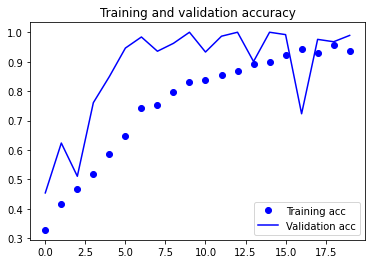

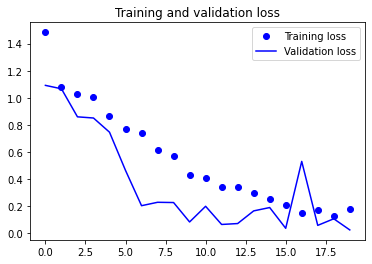

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [23]:
#Fix overfitting
history = model.fit_generator(
train_generator,
     steps_per_epoch=100,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/15
100/100 [==============================] - 117s 1s/step - loss: 0.1241 - acc: 0.9576 - val_loss: 0.1622 - val_acc: 0.9408
Epoch 2/15
100/100 [==============================] - 107s 1s/step - loss: 0.0928 - acc: 0.9692 - val_loss: 0.0562 - val_acc: 0.9674
Epoch 3/15
100/100 [==============================] - 107s 1s/step - loss: 0.0759 - acc: 0.9730 - val_loss: 0.0022 - val_acc: 1.0000
Epoch 4/15
100/100 [==============================] - 107s 1s/step - loss: 0.0630 - acc: 0.9782 - val_loss: 0.0617 - val_acc: 0.9707
Epoch 5/15
100/100 [==============================] - 107s 1s/step - loss: 0.0640 - acc: 0.9790 - val_loss: 0.0504 - val_acc: 0.9734
Epoch 6/15
100/100 [==============================] - 107s 1s/step - loss: 0.0414 - acc: 0.9868 - val_loss: 0.0260 - val_acc: 0.9918
Epoch 7/15
100/100 [==============================] - 106s 1s/step - loss: 0.0552 - acc: 0.9816 - val_loss: 0.0476 - val_acc: 0.9732
Epoch 8/15
100/100 [==============================] - 106s 1s/step - 

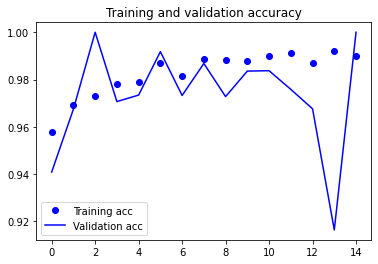

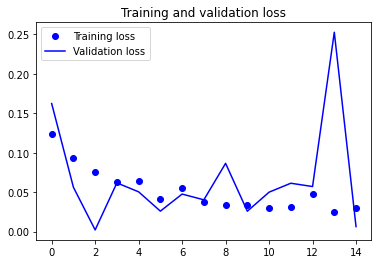

In [24]:
  
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Use the best model to classify gestures
You can now run the following code and use the model you trained to classify images uploaded from your laptop. Let us know how your model performs on the new unseen images.  

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload('/tmp/rps-test-set')

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)
